In [42]:
# Problem 1. - (a)

# import library
import numpy as np
import pandas as pd

# data 불러오기
data = pd.read_csv('regression_data.csv')

# 처음 4줄 출력
data.head(4)

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,1562


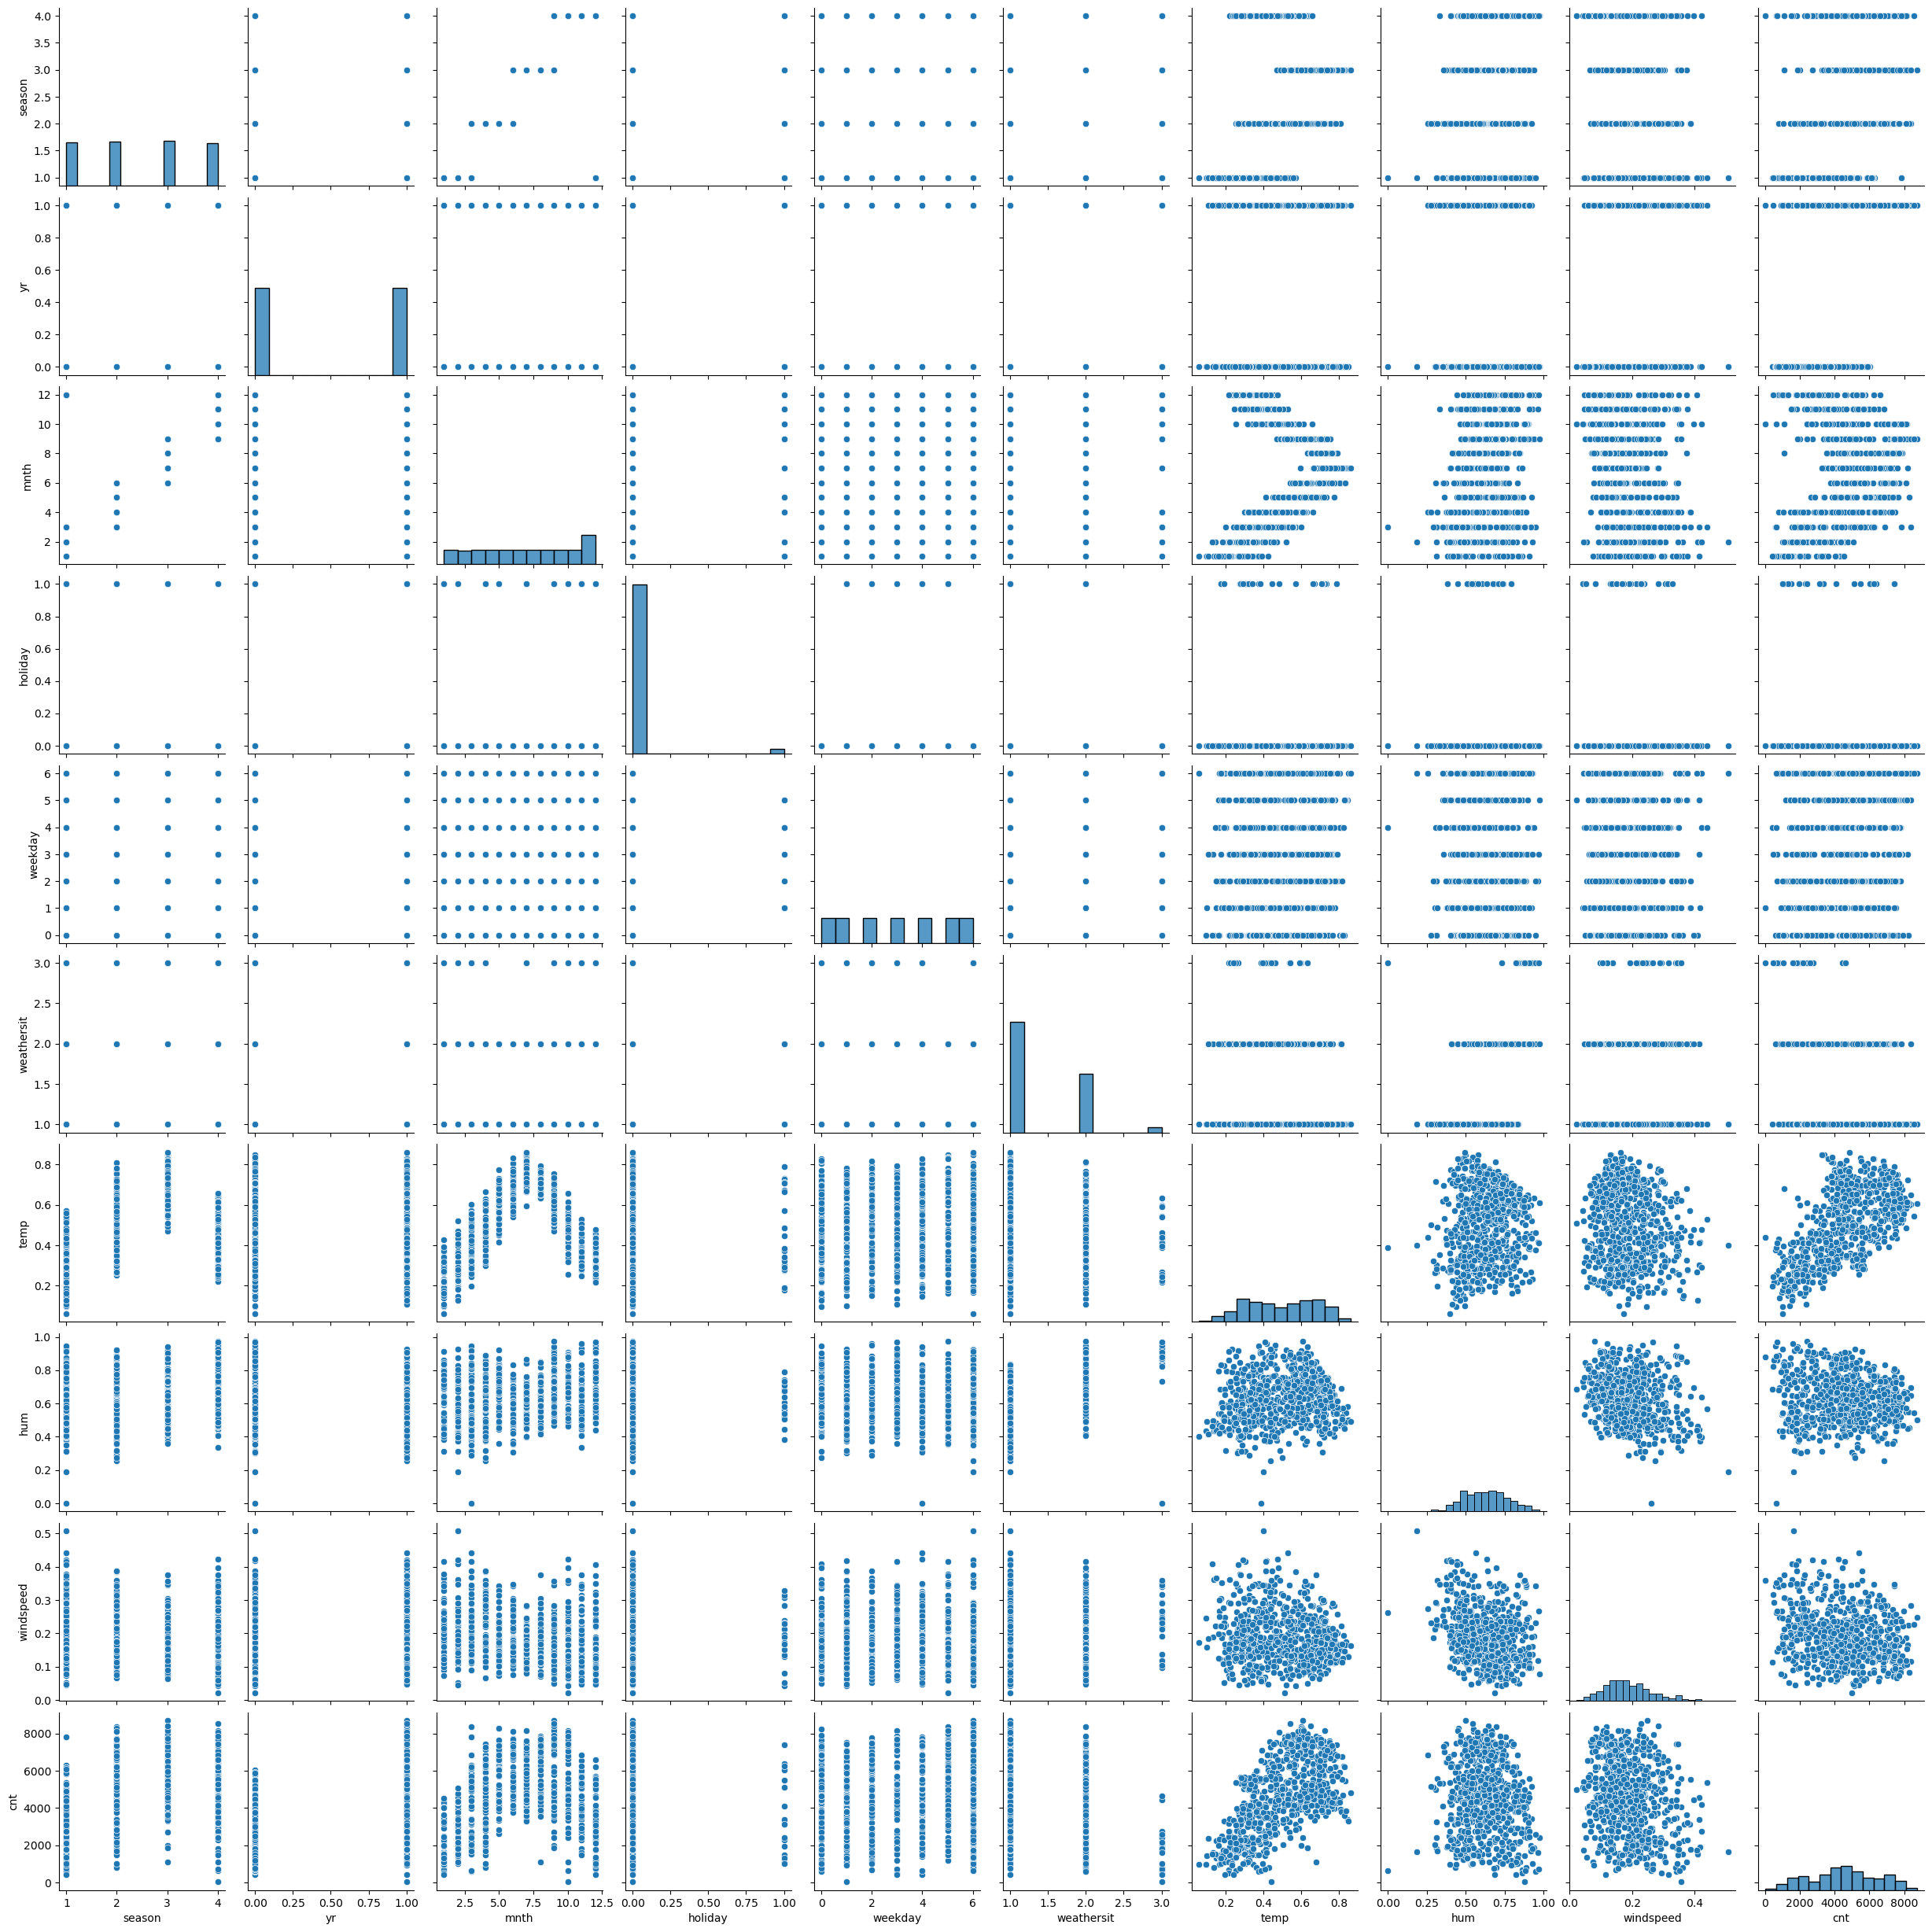

In [6]:
# Problem 1. - (b)

# import library
import seaborn as sns
import matplotlib.pyplot as plt

# scatter plot(pair plot) 그리기
sns.pairplot(data)
plt.show()

변수간의 산점도 행렬을 보면, 
seasons, mnth, weekday, weathersit 변수는 categorial 변수이고,
yr와 holiday는 categorial 변수 중에서도 binary임을 알 수 있다. 
temp, hum, windspeed 변수는 continuous 변수임을 알 수 있다.
상관 관계를 관찰해보면
temp(온도)는 cmt와 강한 양의 선형 관계를 가진다. 이를 통해 온도가 높을수록 자전거 대여량이 증가한다고 해석할 수 있다. 
hum(습도)와 windspeed(풍속)은 cmt와 특별한 관계를 가진다고 볼 수 없다.

In [24]:
# Problem 1. - (c)

import pandas as pd

data1 = data.copy() # one-hot encoding을 위한 데이터 복제

# 이진 변수는 그냥 유지
# categorial 변수인 season, mnth, weekday, weathersit 변수는 one-hot encoding
categorical_cols = ['season', 'mnth', 'weekday', 'weathersit']
data1 = pd.get_dummies(data1, columns=categorical_cols, prefix = categorical_cols)

# 결과 확인
data1

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0.344167,0.805833,0.160446,985,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0,0.363478,0.696087,0.248539,801,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,0,0,0.196364,0.437273,0.248309,1349,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,0,0,0.200000,0.590435,0.160296,1562,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0,0.226957,0.436957,0.186900,1600,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,0.254167,0.652917,0.350133,2114,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
727,1,0,0.253333,0.590000,0.155471,3095,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
728,1,0,0.253333,0.752917,0.124383,1341,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
729,1,0,0.255833,0.483333,0.350754,1796,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [37]:
# Problem 1. - (d)

# target 칼럼이 cnt이므로, 이를 분리
y = data1['cnt']

# features
X = data1.drop('cnt', axis = 1)

# print
print("X : ", X.columns)
print("y : ", y.name)

X :  Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_1', 'season_2',
       'season_3', 'season_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')
y :  cnt


In [41]:
# Problem 1. - (e)

# import dataset
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)

# result
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (548, 31)
X_test :  (183, 31)
y_train :  (548,)
y_test :  (183,)


In [46]:
# Problem 1. - (f)

# import library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# MLR
MLRmodel = LinearRegression()
MLRmodel.fit(X_train, y_train)
MLRy_pred = MLRmodel.predict(X_test)
MLR_R2 = MLRmodel.score(X_test, y_test)
MLR_MSE = mean_squared_error(y_test, MLRy_pred)

# Regression tree
Treemodel = DecisionTreeRegressor(max_depth = 3)
Treemodel.fit(X_train, y_train)
Treey_pred = Treemodel.predict(X_test)
Tree_R2 = Treemodel.score(X_test, y_test)
Tree_MSE = mean_squared_error(y_test, Treey_pred)

# Gradient Boosting
GBmodel = GradientBoostingRegressor(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777)
GBmodel.fit(X_train, y_train)
GBy_pred = GBmodel.predict(X_test)
GB_R2 = GBmodel.score(X_test, y_test)
GB_MSE = mean_squared_error(y_test, GBy_pred)

# XG Boost
XGmodel = XGBRegressor(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777)
XGmodel.fit(X_train, y_train)
XGy_pred = XGmodel.predict(X_test)
XG_R2 = XGmodel.score(X_test, y_test)
XG_MSE = mean_squared_error(y_test, XGy_pred)

# result 생성
results = [
    ["MLR", MLR_R2, MLR_MSE],
    ["Regression Tree", Tree_R2, Tree_MSE],
    ["Gradient Boosting", GB_R2, GB_MSE],
    ["XGBoost", XG_R2, XG_MSE],
]

result_df = pd.DataFrame(results)
result_df.columns = ["", "R2", "MSE"]

# print
print(result_df)

                            R2            MSE
0                MLR  0.828172  592201.040973
1    Regression Tree  0.750404  860225.746470
2  Gradient Boosting  0.880670  411265.621902
3            XGBoost  0.888301  384967.968750


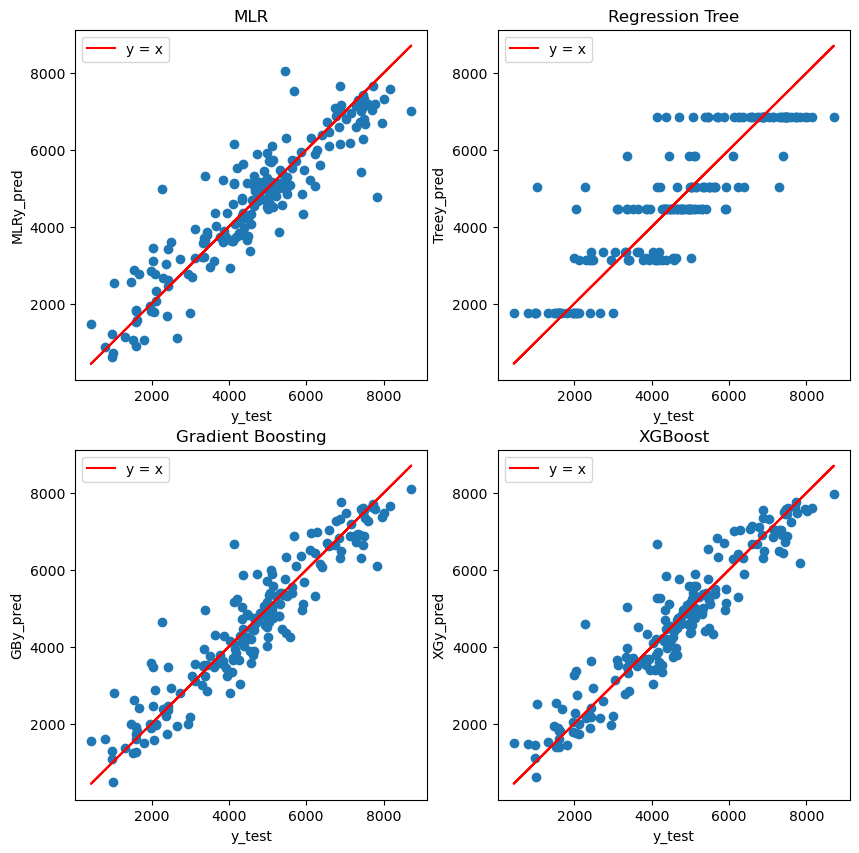

In [53]:
# Problem 1. - (g)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# MLR
plt.subplot(2, 2, 1)
plt.scatter(y_test, MLRy_pred)
plt.plot(y_test, y_test, label = "y = x", color = "r")
plt.title("MLR")
plt.xlabel("y_test")
plt.ylabel("MLRy_pred")
plt.legend()

# Regression Tree
plt.subplot(2, 2, 2)
plt.scatter(y_test, Treey_pred)
plt.plot(y_test, y_test, label = "y = x", color = "r")
plt.title("Regression Tree")
plt.xlabel("y_test")
plt.ylabel("Treey_pred")
plt.legend()

# Gradient Boosting
plt.subplot(2, 2, 3)
plt.scatter(y_test, GBy_pred)
plt.plot(y_test, y_test, label = "y = x", color = "r")
plt.title("Gradient Boosting")
plt.xlabel("y_test")
plt.ylabel("GBy_pred")
plt.legend()

# XGBoost
plt.subplot(2, 2, 4)
plt.scatter(y_test, XGy_pred)
plt.plot(y_test, y_test, label = "y = x", color = "r")
plt.title("XGBoost")
plt.xlabel("y_test")
plt.ylabel("XGy_pred")
plt.legend()

plt.show()

# Problem 1. - (h)

결정계수(R²)는 전체 Y의 변동량 중 모델이 설명하는 변동량의 비율을 말하고, 결정계수의 값이 1에 가까울수록 회귀모델이 데이터를 잘 설명하고 있다고 할 수 있다. (f)에서의 표 결과를 보면, XGBoost 모델이 약 0.888301로 가장 높은 R²을 보여준다.
또한 MSE는 Mean Squared Error를 뜻하는 것으로, 작을수록 모델의 예측값과 실제값의 차이가 적다는 것을 나타낸다. 이 역시 XGBoost 모델이 384967.968750로 가장 낮은 MSE를 보여주고 있다.
따라서, XGBoost 모델의 성능이 가장 좋다고 할 수 있다.

In [56]:
# Problem 2. - (a)

# import library
import numpy as np
import pandas as pd

# data 불러오기
classification_data = pd.read_csv('classification_data.csv', sep=';')

# 처음 4줄 출력
classification_data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


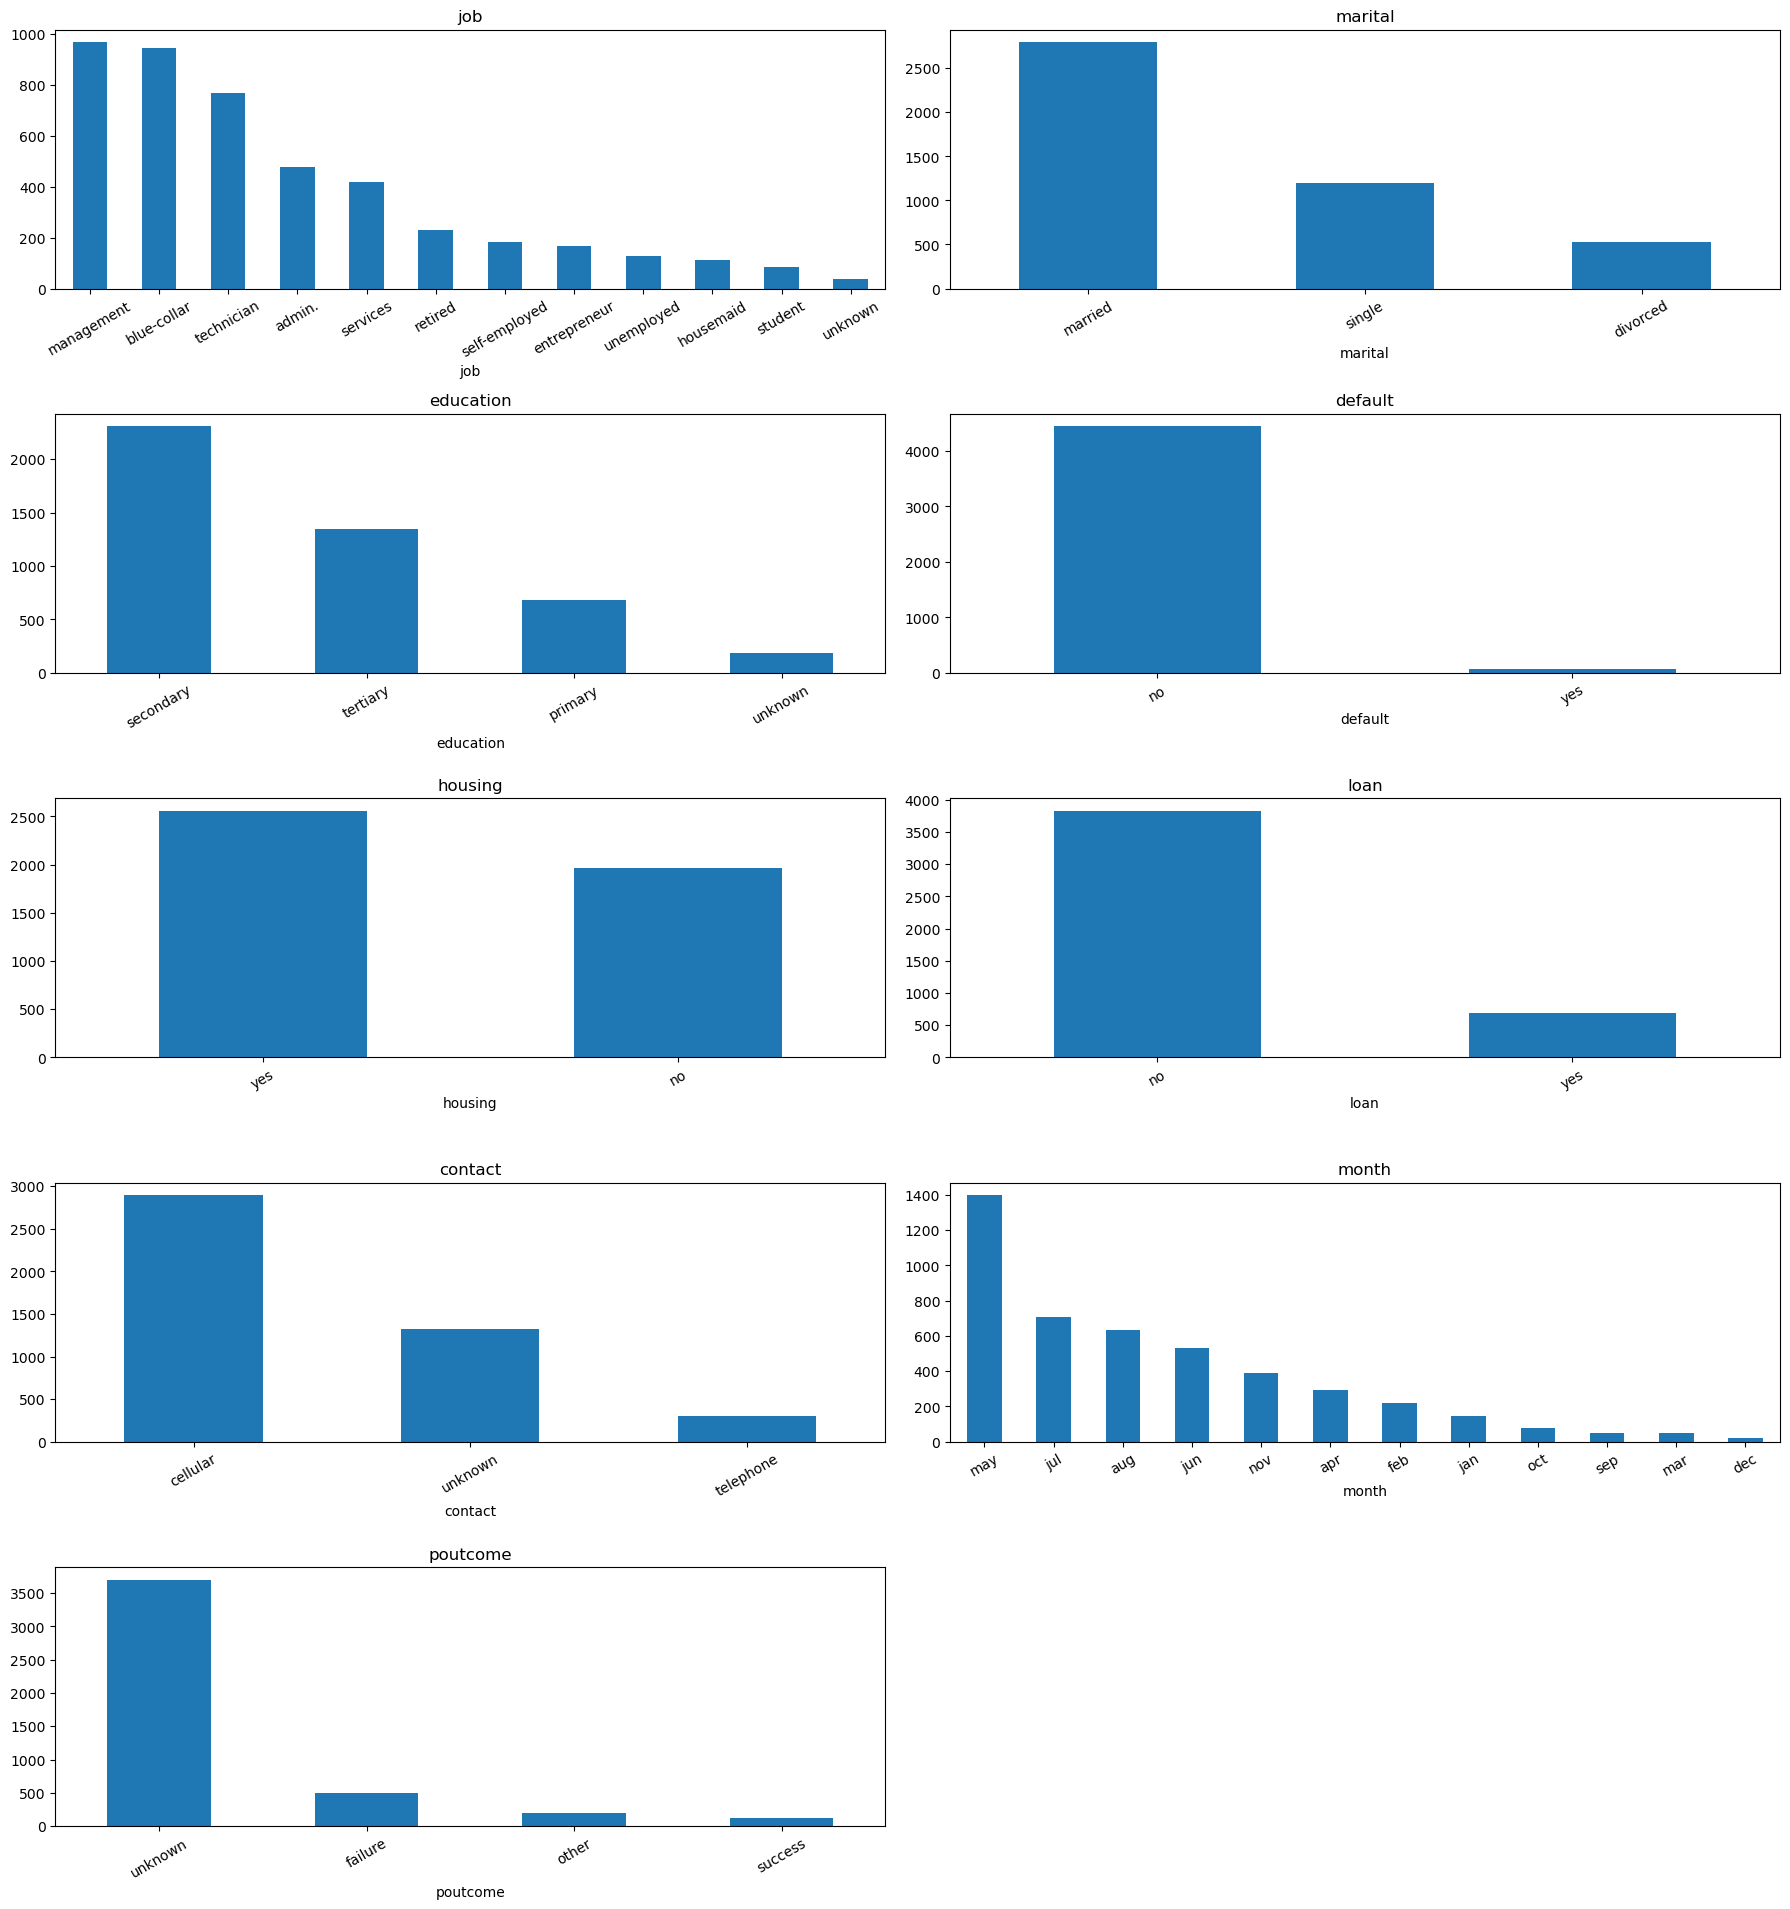

In [83]:
# Problem 2. - (b)

# import library
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 30))

# categorical variable만 추출
categorical_cols = classification_data.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop('y')

# histogram 그리기
for i, col in enumerate(categorical_cols):
    plt.subplot(8, 2, 1+i)
    classification_data[col].value_counts().plot.bar(rot=30)
    plt.title(col)

plt.tight_layout()
plt.show()


categorical variable만을 추출해서 히스토그램을 그렸더니 다음 9개의 변수가 히스토그램으로 그려졌다.
변수들 중 default, housinf, loan 변수는 모두 binary 변수이다.
job 변수는 다양한 범주가 존재하며, 그 중 management, blue-collar, technician의 비중이 높다. 이는 특정 직업군에 따라 보증금 대출 여부가 차이날 수 있다는 것을 체크할 수 있다. 
대부분의 범주형 범수들의 분포가 불균형하므로, 다양한 변수가 보증금 대출 여부에 영향을 주고 있음을 알 수 있다. 특히, default, poutcome, contact 변수는 매우 편향된 분포를 가지고 있다. 

In [88]:
# Problem 2. - (c)

# import library
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data_encoded = classification_data.copy() # 복사

# binary 변수는 label encoding
binary_cols = ['default', 'housing', 'loan']
le = LabelEncoder()
for col in binary_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# binary 변수를 제외한 categorial 변수는 one-hot encoding
onehot_cols = [col for col in categorical_cols if col not in binary_cols]

data_encoded = pd.get_dummies(data_encoded, columns=onehot_cols, prefix = onehot_cols)

# target 변수는 label encoding
data_encoded['y'] = le.fit_transform(data_encoded['y'])

# 결과 출력
data_encoded

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,False,False,False,False,True,False,False,False,False,True
1,33,0,4789,1,1,11,220,1,339,4,...,False,False,True,False,False,False,True,False,False,False
2,35,0,1350,1,0,16,185,1,330,1,...,False,False,False,False,False,False,True,False,False,False
3,30,0,1476,1,1,3,199,4,-1,0,...,True,False,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,...,False,False,False,False,False,False,False,False,False,True
4517,57,1,-3313,1,1,9,153,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4518,57,0,295,0,0,19,151,11,-1,0,...,False,False,False,False,False,False,False,False,False,True
4519,28,0,1137,0,0,6,129,4,211,3,...,False,False,False,False,False,False,False,True,False,False


In [92]:
# Problem 2. - (d)

# target 칼럼이 y이므로, 이를 분리
class_y = data_encoded['y']

# features
class_X = data_encoded.drop('y', axis = 1)

# print
print("X : ", class_X.columns)
print("y : ", class_y.name)

X :  Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
y :  y


In [93]:
# Problem 2. - (e)

# import dataset
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(class_X, class_y, test_size=0.25, random_state=777)

# result
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (3390, 48)
X_test :  (1131, 48)
y_train :  (3390,)
y_test :  (1131,)


In [101]:
# Problem 2. - (f)

# import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Decision Tree
DT = DecisionTreeClassifier(max_depth = 3, random_state=777)
DT.fit(X_train, y_train)
DTy_pred = DT.predict(X_test)
DT_acc = accuracy_score(y_test, DTy_pred)

# Gradient Boosting
GB = GradientBoostingClassifier(max_depth=3, n_estimators=200, learning_rate=0.1, random_state=777)
GB.fit(X_train, y_train)
GBy_pred = GB.predict(X_test)
GB_acc = accuracy_score(y_test, GBy_pred)

# XGBoost
XGB = XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.1, random_state=777)
XGB.fit(X_train, y_train)
XGBy_pred = XGB.predict(X_test)
XGB_acc = accuracy_score(y_test, XGBy_pred)

# Bagging 
Bagging = BaggingClassifier(n_estimators=200, random_state=777)
Bagging.fit(X_train, y_train)
Baggingy_pred = Bagging.predict(X_test)
Bagging_acc = accuracy_score(y_test, Baggingy_pred)

# Random Forest
RF = RandomForestClassifier(max_depth=3, n_estimators=200, random_state=777)
RF.fit(X_train, y_train)
RFy_pred = RF.predict(X_test)
RF_acc = accuracy_score(y_test, RFy_pred)

# result 생성
class_results = pd.DataFrame({
    "": ["DT", "GB", "XGB", "Bagging", "RF"],
    "Accuracy": [DT_acc, GB_acc, XGB_acc, Bagging_acc, RF_acc]
})

class_results = class_results.set_index("").T

# print
print(class_results)

                DT        GB       XGB   Bagging        RF
Accuracy  0.901857  0.900088  0.900088  0.896552  0.896552


In [118]:
# Problem 2. - (g)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

model_names = ["Decision Tree", "Gradient Boosting", "XGBoost", "Bagging", "Random Forest"]
y_preds = [DTy_pred, GBy_pred, XGBy_pred, Baggingy_pred, RFy_pred]
accuracies = [DT_acc, GB_acc, XGB_acc, Bagging_acc, RF_acc]

for i, (model_name, y_pred, accuracy) in enumerate(zip(model_names, y_preds, accuracies)):
    print("========================")
    print(f'{model_name} 결과')
    print("========================")
    print(f'  confusion matrix')
    mtx = confusion_matrix(y_test, y_pred)
    label = ['NO', 'YES']
    table = pd.DataFrame(mtx, columns = label, index = label)
    print(table)
    print(f'Accuracy')
    print(accuracy)
    print('\n')

Decision Tree 결과
  confusion matrix
      NO  YES
NO   978   36
YES   75   42
Accuracy
0.9018567639257294


Gradient Boosting 결과
  confusion matrix
      NO  YES
NO   975   39
YES   74   43
Accuracy
0.9000884173297966


XGBoost 결과
  confusion matrix
      NO  YES
NO   979   35
YES   78   39
Accuracy
0.9000884173297966


Bagging 결과
  confusion matrix
      NO  YES
NO   970   44
YES   73   44
Accuracy
0.896551724137931


Random Forest 결과
  confusion matrix
       NO  YES
NO   1014    0
YES   117    0
Accuracy
0.896551724137931




# Problem 2. - (h)

Accuracy 값을 비교하면, Decision Tree가 약 90.19%로 가장 높은 정확도를 기록했다. 따라서 Decision Tree 모델이 이 데이터에서 가장 적합한 모델이라고 할 수 있다. 